# Tutorial - Importing and Plotting Data with Jupyter Notebooks
This Jupyter notebook will remind you (or help you learn) how to plot data using Python. 

Jupyter notebooks are a combination of code cells and markdown (text) cells. What you are reading right now is a markdown cell. Double click this text and now you can edit it! When you are done, click the check box in the top right or hit ctrl-enter to go back to nicely formatted view. 

These notebooks are awesome for data analysis because you can both run code to generate plots AND take notes about what you are doing at the same time. You'll want to get comfortable working with them as this is where all of our data analysis will be happening. Just hover over the bottom of this cell and controls to add new markdown or code block will appear. Try adding a new markdown block and adding some text. 

A few formatting tips: 

Headings: "# Heading" 

Bullet lists: "- Item 1" 

Numbered lists: "1. Item 1"





# Generate Some Data for this Tutorial

The first step in this tutorial is to generate some data to plot. We'll use the PhyPhox app from the pre-lab. 

1. If you haven't already, download PhyPhox which lets you capture accelerometer data using your phone.
    - Android:  [PhyPhox app](https://play.google.com/store/apps/details?id=de.rwth_aachen.phyphox) 
    - iOS:  [PhyPhox app](https://apps.apple.com/us/app/phyphox/id1127319693?l=de&ls=1)
1. Open the app
    - Choose “acceleration with g” 
    - Start recording data and move your phone. Any motion is fine, even as simple as rotating your phone. 
    - Record at least 5 seconds of data. 
1. Export the data as "CSV (Comma, decimal point)" and move it to your computer by saving it to the cloud or emailing it to yourself.  
1. Move the data into the Lab 1 directory in VS Code (the same spot you found this file). Give it a meaningful name, like "Tutorial Data.csv"

## Initialize Your Libraries

As with any Python code, the first step is to import and initialize the Python libraries you'll need to make the plots. Run the code cell below by clicking the triangular "play" buttonn on the left when you hover over the cell.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.signal import welch # We'll need this for power spectral density estimation eventually

# Allow for interactive plotting in Jupyter notebooks, comment out the line to turn this off. 
# The % sign is a Jupyter magic command that enables the use of widgets in the notebook.
# This requires installing the ipympl package, so if you get an error on this line, 
# you may need to install it first by running: pip install ipympl

%matplotlib widget 

# For interactive data point selection in plots, this library is useful.
import mplcursors 

# Add this line of code to each plot if you want cursors: 
# mplcursors.cursor(hover=False, multiple=True)  # Enable interactive cursor for data point selection, right-click to remove cursor

# Use this command to set the default font size for your plots.
sns.set_context("notebook")
# Options from smallest to largest: "paper", "notebook", "talk", "poster"

### What did we just import?

Each library serves a specific purpose for data analysis and visualization:

- **numpy**: Provides numerical computing tools and array operations
- **matplotlib**: The core plotting library for creating static, animated, and interactive visualizations
- **seaborn**: Built on top of matplotlib, provides a high-level interface for creating attractive statistical graphics
- **pandas**: Used for data manipulation and analysis, especially for reading CSV files and working with tabular data
- **scipy.signal.welch**: A function for computing power spectral density (we'll use this later)
- **mplcursors**: Enables interactive data point selection on plots, allowing you to click on points to see their exact values

The `%matplotlib widget` command enables interactive plots within the notebook, and `sns.set_context()` sets the default font sizes for all plots.

## Import Your Data

Now that we've got our libraries set up, the next step is to import the data you recorded with PhyPhox. Click the Play icon to run the next cell. You may need to change the file name to match whatever name you chose for your data file. 

In [4]:
# import the dataset, view the first few rows
myData = pd.read_csv("Tutorial Data.csv") # Make sure to update this file name to match your data! 
myData.head() #This will display the first few rows of the DataFrame

,Time (s),Acceleration x (m/s^2),Acceleration y (m/s^2),Acceleration z (m/s^2),Absolute acceleration (m/s^2)
0,0.000166,-0.877775,6.606212,7.420369,9.973686
1,0.010136,-0.715662,6.666836,6.998397,9.692081
2,0.020106,-0.753683,6.716234,6.818770,9.600597
3,0.030075,-0.834664,6.713240,6.900351,9.663286
4,0.040045,-0.885858,6.670429,7.122938,9.798755


Nice! You've imported the data. Let's inspect this in more detail - click on "Open 'myData' in Data Wrangler" above and scroll around to check out the data set you just imported.

## Plotting a Single Time Series

Now let's actually plot some of this data. Read the cell below and then run it. 

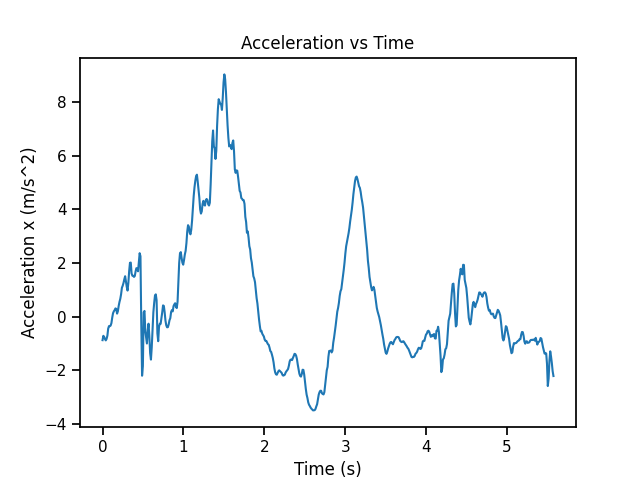

In [5]:
plt.figure()  # Create a new figure
sns.lineplot(x="Time (s)", y="Acceleration x (m/s^2)", data=myData)
plt.title("Acceleration vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration x (m/s^2)")

mplcursors.cursor(hover=False)  # Enable interactive cursor for data point selection

# Click anywhere on your data to add a cursor
# Right-click to remove a cursor

plt.show()

Let's explore this data using the interactive plot tools:  
- Add a cursor to the plot by left clicking on the data
- Remove it by right clicking on the yellow box that popped up
- Add a new cursur by left clicking in a new data point 
- You can also zoom in and out using the floating controls that pop up when you hover over the graph. 
    - Use the zoom to rectangle tool (the open square, fifth down) to zoom in
    - Use the pan tool (two arrows crossing) to drag around the plot
    - Click the home button to reset the view
    - Click the save button to export the plot (for example to use in a report) 

## More Advanced Plotting Controls

Read the code block below and then run it. What new things have been introduced in the code here? Type your answer in the box below: 

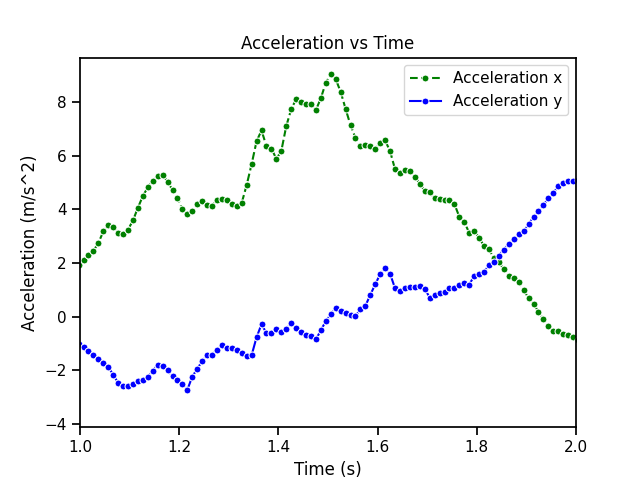

In [6]:
# Plotting both acceleration x and y on the same graph
plt.figure()  # Create a new figure
sns.lineplot(x="Time (s)", y="Acceleration x (m/s^2)", data=myData, marker="o",
              markersize=5, color = "green", linestyle="--", label="Acceleration x") # Plot the x data
sns.lineplot(x="Time (s)", y="Acceleration y (m/s^2)", data=myData, marker="o",
              markersize=5, color = "blue", linestyle="-", label="Acceleration y") # Plot the y data
plt.title("Acceleration vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.xlim(1, 2)  # Set x-axis limits
plt.show()

Next, create a new code block below this cell and copy the code from the block above. Modify it to: 
- Plot the z axis data using a red line with a line style of "-."
- Remove the markers from all the data sets
- Set the Y axis limit to range from -15 to 15

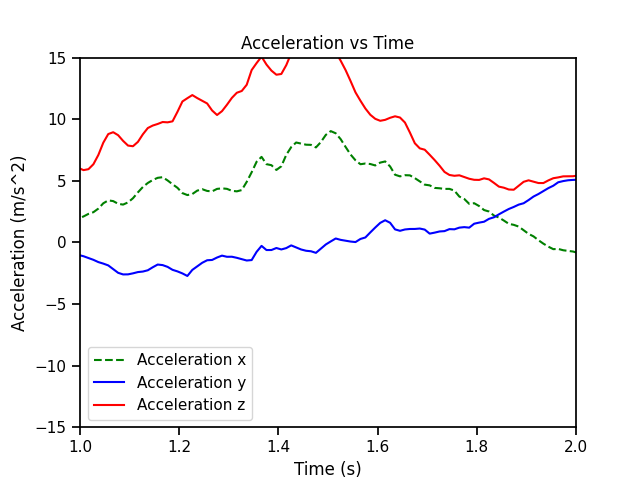

In [7]:
# Plotting both acceleration x and y on the same graph
plt.figure()  # Create a new figure
sns.lineplot(x="Time (s)", y="Acceleration x (m/s^2)", data=myData, 
              markersize=5, color = "green", linestyle="--", label="Acceleration x") # Plot the x data
sns.lineplot(x="Time (s)", y="Acceleration y (m/s^2)", data=myData, 
              markersize=5, color = "blue", linestyle="-", label="Acceleration y") # Plot the y data
sns.lineplot(x="Time (s)", y="Acceleration z (m/s^2)", data=myData,
              markersize=5, color = "red", linestyle="-", label="Acceleration z") # Plot the z data
plt.title("Acceleration vs Time")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m/s^2)")
plt.xlim(1, 2)  # Set x-axis limits
plt.ylim(-15,15)
plt.show()

## Plotting Multiple Time Series with Subplots

Sometimes rather than plotting data on a single plot, it is preferable to plot each data set on its own sub plot. Run the code block below to plot the X and Y data on two sub plots. 

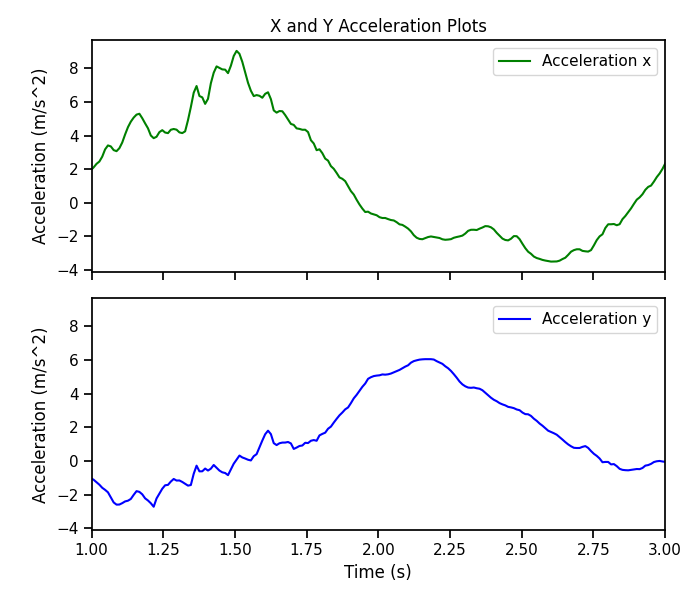

In [8]:
# Creating sub plots for x and y accelerations
fig, ax = plt.subplots(2, 1, figsize=(7, 6), sharex=True, sharey=True)

sns.lineplot(x="Time (s)", y="Acceleration x (m/s^2)", data=myData,
              color = "green", linestyle="-", label="Acceleration x", ax=ax[0])
sns.lineplot(x="Time (s)", y="Acceleration y (m/s^2)", data=myData,
              color = "blue", linestyle="-", label="Acceleration y", ax=ax[1])

ax[0].set_title("X and Y Acceleration Plots") # Set title for the first plot
plt.xlabel("Time (s)")
ax[0].set_ylabel("Acceleration (m/s^2)") # Set y-label for the first plot
ax[1].set_ylabel("Acceleration (m/s^2)") # Set y-label for the second plot

plt.xlim(1, 3)  # Set x-axis limits
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

Next create a new code block below and create a sub plot with 3 plots that adds the Z acceleration data.

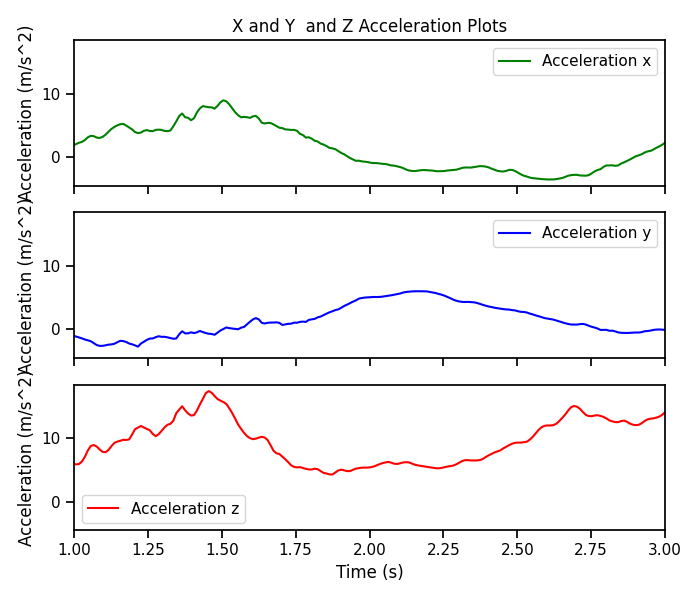

In [9]:
# Creating sub plots for x and y and z accelerations
fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharex=True, sharey=True)

sns.lineplot(x="Time (s)", y="Acceleration x (m/s^2)", data=myData,
              color = "green", linestyle="-", label="Acceleration x", ax=ax[0])
sns.lineplot(x="Time (s)", y="Acceleration y (m/s^2)", data=myData,
              color = "blue", linestyle="-", label="Acceleration y", ax=ax[1])
sns.lineplot(x="Time (s)", y="Acceleration z (m/s^2)", data=myData,
              color = "red", linestyle="-", label="Acceleration z", ax=ax[2])

ax[0].set_title("X and Y  and Z Acceleration Plots") # Set title for the first plot
plt.xlabel("Time (s)")
ax[0].set_ylabel("Acceleration (m/s^2)") # Set y-label for the first plot
ax[1].set_ylabel("Acceleration (m/s^2)") # Set y-label for the second plot
ax[2].set_ylabel("Acceleration (m/s^2)") # Set y-label for the third plot

plt.xlim(1, 3)  # Set x-axis limits
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Scaling Data

Sometimes you'll want to scale the data you imported to convert units. This example shows you how to convert from seconds to milliseconds. Run it. 

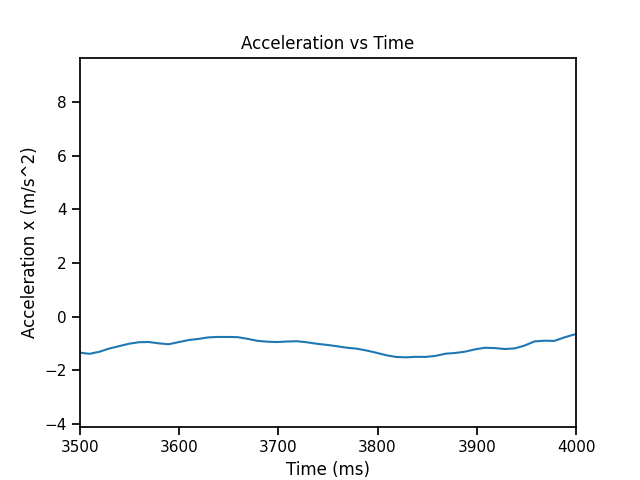

In [10]:
myData['Time (ms)'] = myData['Time (s)']*1000  # Create a new column in the dataframe based on the existing time column * 1000 

plt.figure()  # Create a new figure
sns.lineplot(x="Time (ms)", y="Acceleration x (m/s^2)", data=myData)
plt.title("Acceleration vs Time")
plt.xlabel("Time (ms)")
plt.ylabel("Acceleration x (m/s^2)")
plt.xlim(3500, 4000)  # Set x-axis limits

mplcursors.cursor(hover=False)  # Enable interactive cursor for data point selection
# Click anywhere on your data to add a cursor
# Right-click to remove a cursor

plt.show()

Using the code above as a reference, create a code cell where you create a new column in the data frame named "Acceleration y (g)" that changes the units from m/s^2 to g. (Hint: 1 g = 9.8 m/s^2) Create a plot with this new data. 

# Submit On Canvas
Export your notebook as an HTML file and submit on Canvas. (Click the ... at the top of the notebook file and choose export) 

# Ready, Set, Go!
Ok, that's it! You are ready to start using Python to plot your data from Lab 1. You can use the template file Lab 1 Data Processing to get started once you've collected some data. 